In [7]:
import joblib
import pandas as pd
import  numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import pandas
%matplotlib inline
import pandas_profiling
import pandas_datareader
import math
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
import math
from sklearn import metrics

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import linear_model

In [15]:
df= pd.read_csv('crypto_historical_data.csv', )
df

Date          Open          High           Low         Close  \
0     30/09/2021  41551.269530  44092.601560  41444.582030  43790.894530   
1     01/10/2021  43816.742190  48436.011720  43320.023440  48116.941410   
2     02/10/2021  48137.468750  48282.062500  47465.496090  47711.488280   
3     03/10/2021  47680.027340  49130.691410  47157.289060  48199.953130   
4     04/10/2021  48208.906250  49456.777340  47045.003910  49112.902340   
...          ...           ...           ...           ...           ...   
3021  25/02/2022     13.268253     14.455963     13.161279     14.338566   
3022  26/02/2022     14.338097     14.892527     14.193047     14.690320   
3023  27/02/2022     14.688767     14.817864     13.569325     13.654266   
3024  28/02/2022     13.653063     15.116470     13.430254     15.116470   
3025  01/03/2022     15.117332     15.687609     14.846280     15.334708   

            Volume  Dividends  Stock Splits symbol       name  
0     3.114168e+10          0             0    BTC    Bitcoin  
1     4.285064e+10          0             0    BTC    Bitcoin  
2     3.061435e+10          0             0    BTC    Bitcoin  
3     2.663812e+10          0             0    BTC    Bitcoin  
4     3.338317e+10          0             0    BTC    Bitcoin  
...            ...        ...           ...    ...        ...  
3021  8.956441e+08          0             0   LINK  Chainlink  
3022  7.206639e+08          0             0   LINK  Chainlink  
3023  7.712504e+08          0             0   LINK  Chainlink  
3024  8.476613e+08          0             0   LINK  Chainlink  
3025  8.795797e+08          0             0   LINK  Chainlink  

[3026 rows x 10 columns]

In [16]:
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [17]:
df=df.drop(['Dividends','Stock Splits'], axis=1)
df

Open          High           Low         Close  \
Date                                                                 
30/09/2021  41551.269530  44092.601560  41444.582030  43790.894530   
01/10/2021  43816.742190  48436.011720  43320.023440  48116.941410   
02/10/2021  48137.468750  48282.062500  47465.496090  47711.488280   
03/10/2021  47680.027340  49130.691410  47157.289060  48199.953130   
04/10/2021  48208.906250  49456.777340  47045.003910  49112.902340   
...                  ...           ...           ...           ...   
25/02/2022     13.268253     14.455963     13.161279     14.338566   
26/02/2022     14.338097     14.892527     14.193047     14.690320   
27/02/2022     14.688767     14.817864     13.569325     13.654266   
28/02/2022     13.653063     15.116470     13.430254     15.116470   
01/03/2022     15.117332     15.687609     14.846280     15.334708   

                  Volume symbol       name  
Date                                        
30/09/2021  3.114168e+10    BTC    Bitcoin  
01/10/2021  4.285064e+10    BTC    Bitcoin  
02/10/2021  3.061435e+10    BTC    Bitcoin  
03/10/2021  2.663812e+10    BTC    Bitcoin  
04/10/2021  3.338317e+10    BTC    Bitcoin  
...                  ...    ...        ...  
25/02/2022  8.956441e+08   LINK  Chainlink  
26/02/2022  7.206639e+08   LINK  Chainlink  
27/02/2022  7.712504e+08   LINK  Chainlink  
28/02/2022  8.476613e+08   LINK  Chainlink  
01/03/2022  8.795797e+08   LINK  Chainlink  

[3026 rows x 7 columns]

In [57]:
df.skew()

C:\Users\akeis\AppData\Local\Temp\ipykernel_14652\547062910.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Open       4.294305
High       4.290773
Low        4.297118
Close      4.293311
Volume    38.937473
dtype: float64

In [58]:
df.isnull()

Open   High    Low  Close  Volume  symbol   name
Date                                                         
2021-09-30  False  False  False  False   False   False  False
2021-01-10  False  False  False  False   False   False  False
2021-02-10  False  False  False  False   False   False  False
2021-03-10  False  False  False  False   False   False  False
2021-04-10  False  False  False  False   False   False  False
...           ...    ...    ...    ...     ...     ...    ...
2022-02-25  False  False  False  False   False   False  False
2022-02-26  False  False  False  False   False   False  False
2022-02-27  False  False  False  False   False   False  False
2022-02-28  False  False  False  False   False   False  False
2022-01-03  False  False  False  False   False   False  False

[3026 rows x 7 columns]

In [59]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
symbol    0
name      0
dtype: int64

In [60]:
df.corr()

Open      High       Low     Close    Volume
Open    1.000000  0.999771  0.999629  0.999393 -0.003606
High    0.999771  1.000000  0.999637  0.999749 -0.003606
Low     0.999629  0.999637  1.000000  0.999706 -0.003612
Close   0.999393  0.999749  0.999706  1.000000 -0.003610
Volume -0.003606 -0.003606 -0.003612 -0.003610  1.000000

In [6]:
report =pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.shape

(3026, 8)

In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'symbol', 'name'], dtype='object')

In [9]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
symbol            object
name              object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3026 non-null   datetime64[ns]
 1   Open    3026 non-null   float64       
 2   High    3026 non-null   float64       
 3   Low     3026 non-null   float64       
 4   Close   3026 non-null   float64       
 5   Volume  3026 non-null   float64       
 6   symbol  3026 non-null   object        
 7   name    3026 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 189.2+ KB


In [7]:
df.describe()

Open          High           Low         Close        Volume
count   3026.000000   3026.000000   3026.000000   3026.000000  3.026000e+03
mean    2764.559410   2829.793071   2691.905452   2763.868356  6.075825e+10
std    11111.340890  11364.596524  10829.795151  11107.799317  2.072702e+12
min        0.000007      0.000007      0.000007      0.000007  1.054528e+07
25%        0.999152      1.000532      0.996520      0.999211  8.288452e+08
50%        2.362510      2.474080      2.270193      2.366862  1.656420e+09
75%      107.568438    111.373449    101.217848    107.462643  3.433741e+09
max    67549.734380  68789.625000  66382.062500  67566.828130  8.325210e+13

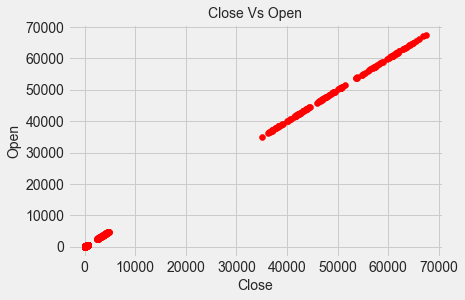

In [22]:
plt.scatter(df['Open'], df['Open'], color='red')
plt.title('Close Vs Open', fontsize=14)
plt.xlabel('Close', fontsize=14)
plt.ylabel('Open', fontsize=14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Date'>

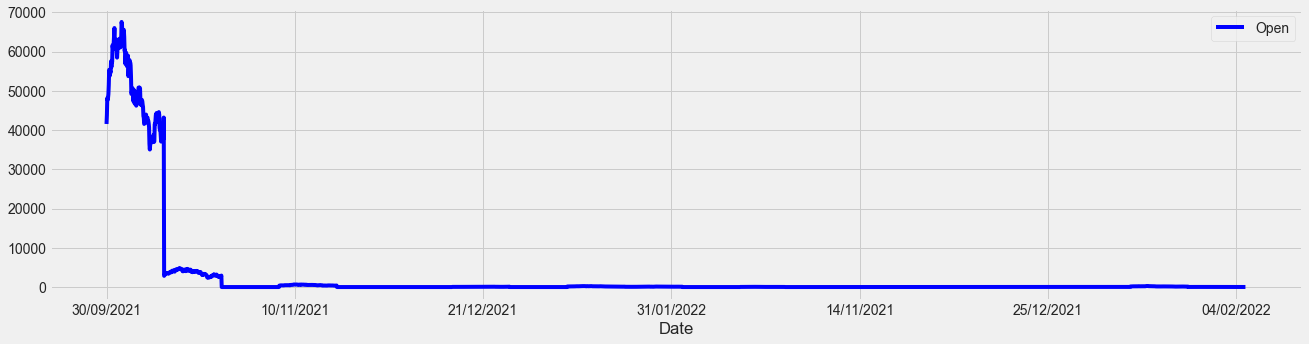

In [23]:
df.plot(x= None, y= 'Open',legend=True, figsize=(20,5), color = 'blue')

<AxesSubplot:xlabel='Date'>

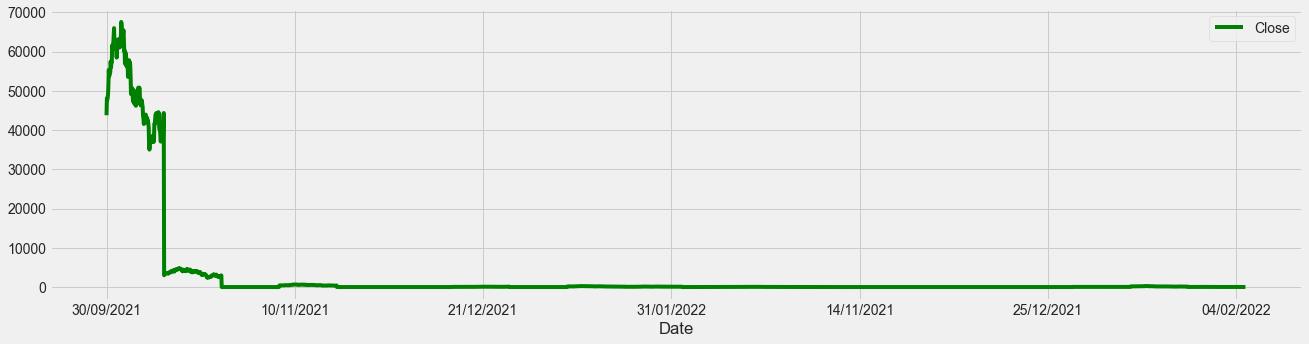

In [24]:
df.plot(x= None, y= 'Close',legend=True, figsize=(20,5), color = 'green')

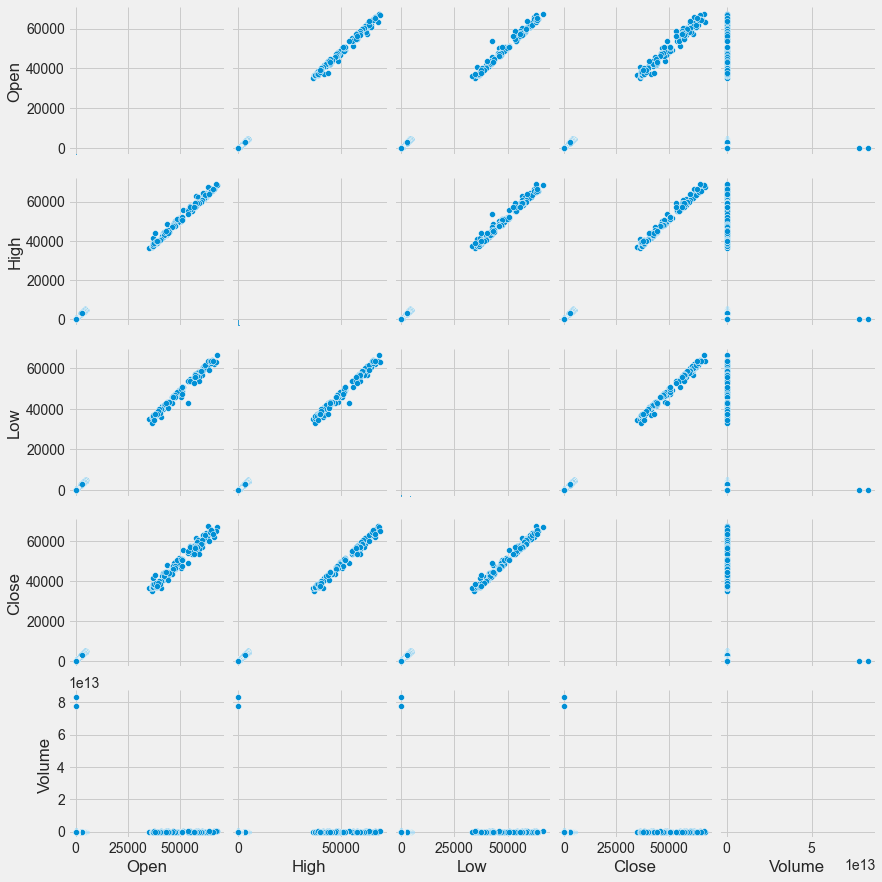

In [12]:
sns.pairplot(df.loc[:, df.dtypes == 'float64'])

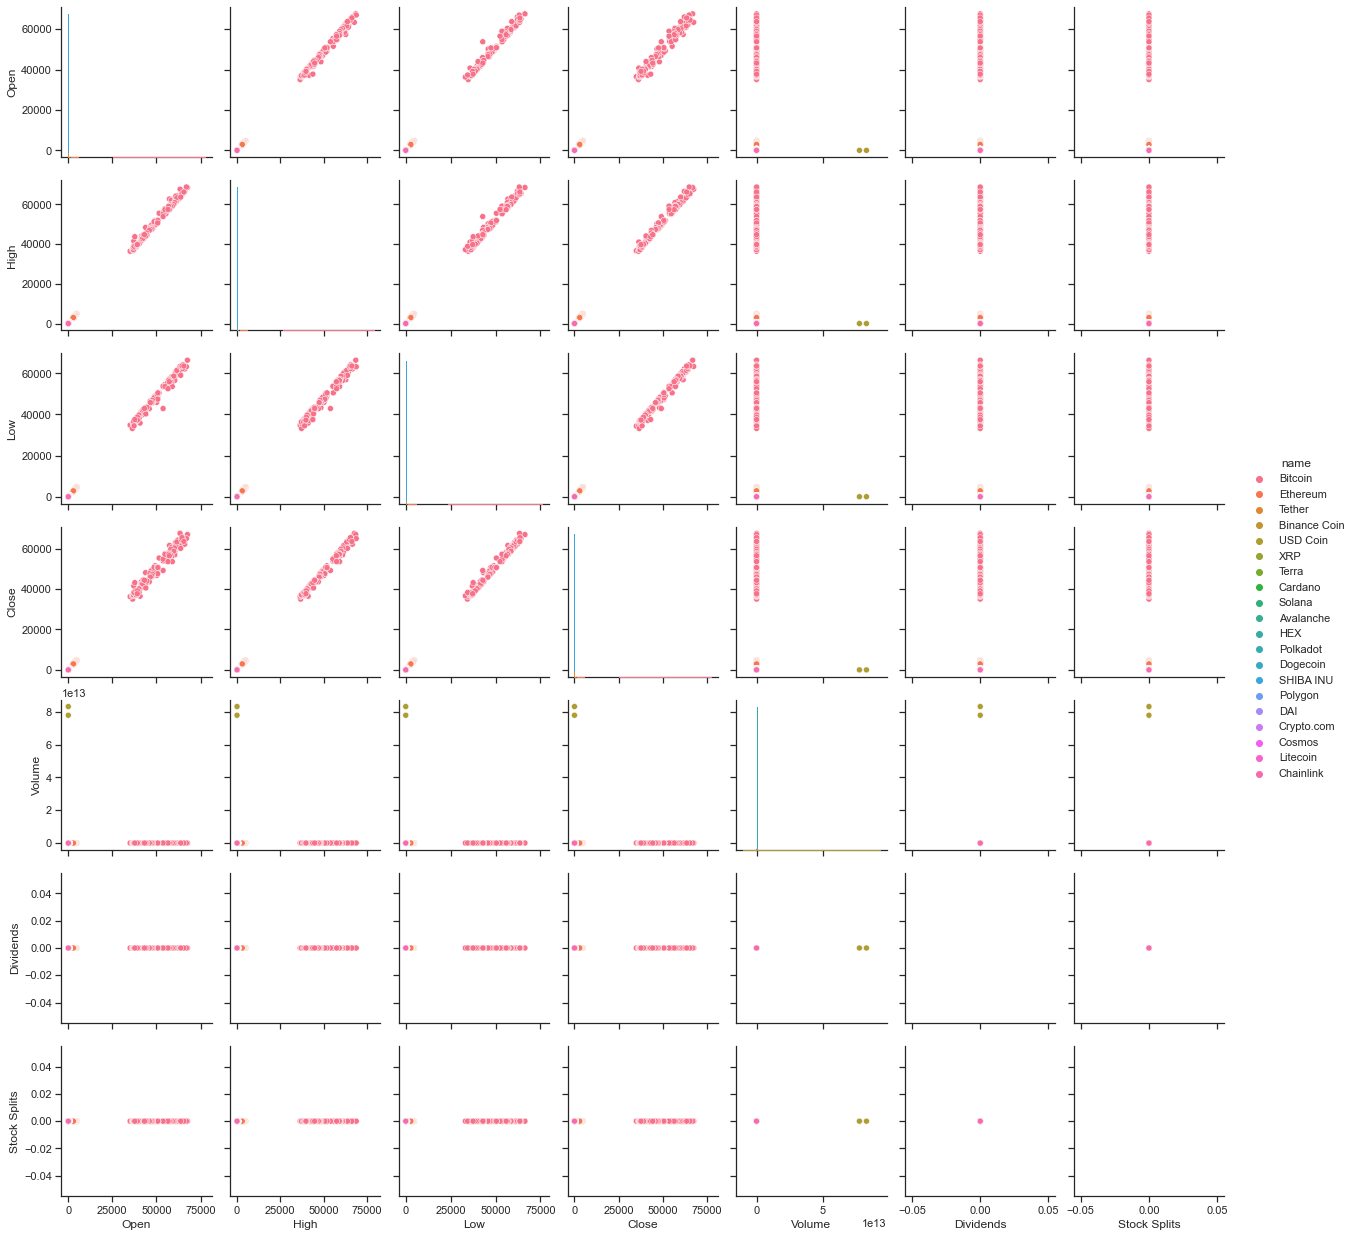

In [90]:
data = df
sns.set_theme(style="ticks")
sns.pairplot(data, hue='name')

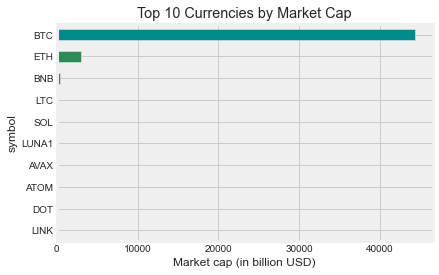

In [34]:
colors_list = ['#FF8C00','#008B8B','#FF8C00','#FF4500','#FF4500','#6f00ff','#FF8C00','#696969','#2E8B57','#008B8B']
ax = df.groupby(['symbol'])['Close'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=colors_list);
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

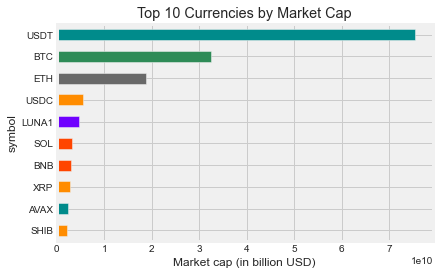

In [35]:
colors_list = ['#FF8C00','#008B8B','#FF8C00','#FF4500','#FF4500','#6f00ff','#FF8C00','#696969','#2E8B57','#008B8B']
ax = df.groupby(['symbol'])['Volume'].last().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color=colors_list);
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Top 10 Currencies by Market Cap");

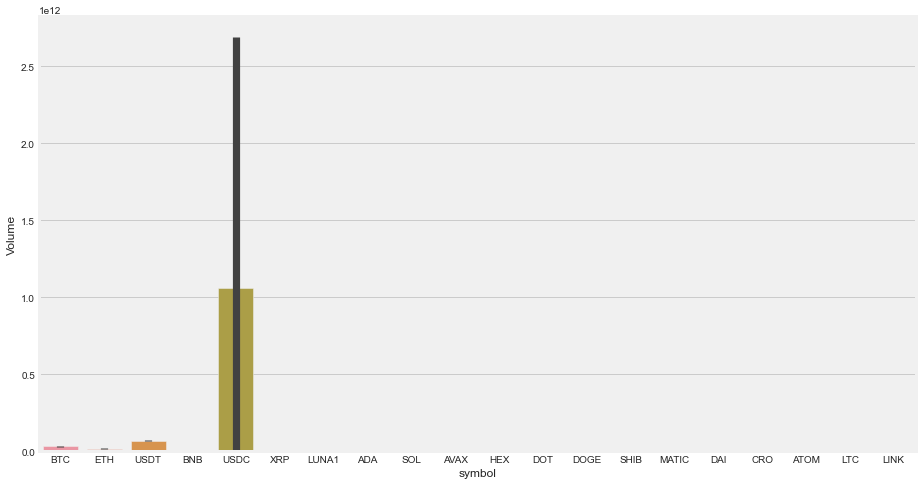

In [41]:
plt.figure(figsize=(14,8))
sns.barplot(x='symbol', y='Volume', data=df, estimator=np.mean);

<AxesSubplot:>

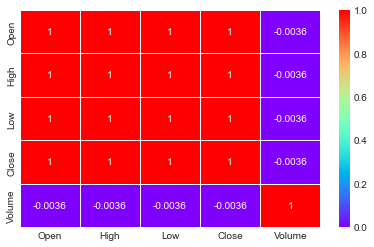

In [61]:
corr = df.corr()
sns.heatmap(corr, cmap = 'rainbow', annot=True, linewidth = 1)

In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
year_2021 = df.loc[(df['Date'] >= '2021-01-01')
                        & (df['Date'] < '2022-01-01')]
year_2021.drop(year_2021[['High', 'Low', 'Volume', 'Open']], axis=1)
months_2021 = year_2021.groupby(year_2021['Date'].dt.strftime('%B'))[['Open', 'Close']].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']
months_2021 = round(months_2021.reindex(month_order, axis=0), 2)
months_2021 = months_2021.reset_index()
fig = px.bar(months_2021, x='Date', y=['Open', 'Close'], barmode='group',
             title='Monthly Average Open & Close Price - Year 2021')
fig.show()

KeyError: 'Date'

In [19]:
bitcoin_data = df[df['symbol']=='BTC']
bitcoin_data.head()

Date         Open         High          Low        Close  \
0 2021-09-30  41551.26953  44092.60156  41444.58203  43790.89453   
1 2021-01-10  43816.74219  48436.01172  43320.02344  48116.94141   
2 2021-02-10  48137.46875  48282.06250  47465.49609  47711.48828   
3 2021-03-10  47680.02734  49130.69141  47157.28906  48199.95313   
4 2021-04-10  48208.90625  49456.77734  47045.00391  49112.90234   

         Volume symbol     name  
0  3.114168e+10    BTC  Bitcoin  
1  4.285064e+10    BTC  Bitcoin  
2  3.061435e+10    BTC  Bitcoin  
3  2.663812e+10    BTC  Bitcoin  
4  3.338317e+10    BTC  Bitcoin

In [20]:
Eth_data = df[df['symbol']=='ETH']
Eth_data.head()

Date         Open         High          Low        Close  \
153 2021-09-30  2852.558838  3046.519531  2840.289551  3001.678955   
154 2021-01-10  3001.129395  3329.853516  2978.654297  3307.516113   
155 2021-02-10  3308.870361  3464.837402  3260.027588  3391.694336   
156 2021-03-10  3390.767578  3484.605713  3348.120117  3418.358643   
157 2021-04-10  3418.776367  3434.775391  3283.448730  3380.089111   

           Volume symbol      name  
153  1.766107e+10    ETH  Ethereum  
154  2.230763e+10    ETH  Ethereum  
155  1.920267e+10    ETH  Ethereum  
156  1.551657e+10    ETH  Ethereum  
157  1.774715e+10    ETH  Ethereum

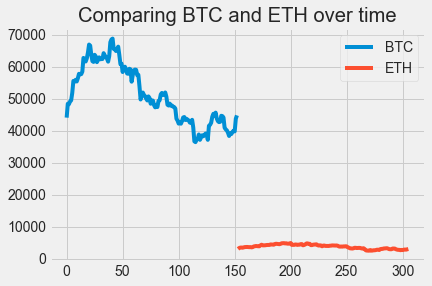

In [21]:
bitcoin_data.High.plot()
Eth_data.High.plot()
plt.legend(['BTC','ETH'])
_ = plt.title('Comparing BTC and ETH over time')
plt.show()

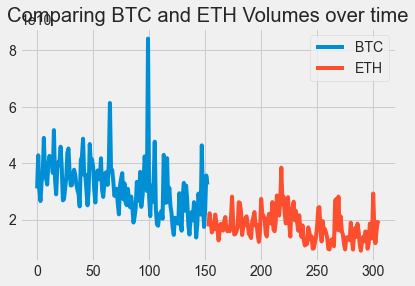

In [22]:
bitcoin_data.Volume.plot()
Eth_data.Volume.plot()
plt.legend(['BTC','ETH'])
_ = plt.title('Comparing BTC and ETH Volumes over time')
plt.show()

In [23]:
bitcoin_data.describe()

Open         High           Low         Close        Volume
count    153.000000    153.00000    153.000000    153.000000  1.530000e+02
mean   49979.754238  51130.90717  48702.443679  49968.268843  3.151850e+10
std     8980.037808   9123.44286   8808.123263   8953.885388  9.511833e+09
min    35047.359380  36433.31250  33184.058590  35030.250000  1.373656e+10
25%    42406.781250  43346.68750  41680.320310  42412.433590  2.512209e+10
50%    48379.753910  49473.95703  47045.003910  48199.953130  3.096601e+10
75%    57830.113280  59266.35938  56792.527340  57569.074220  3.685108e+10
max    67549.734380  68789.62500  66382.062500  67566.828130  8.419661e+10

In [24]:
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    153 non-null    datetime64[ns]
 1   Open    153 non-null    float64       
 2   High    153 non-null    float64       
 3   Low     153 non-null    float64       
 4   Close   153 non-null    float64       
 5   Volume  153 non-null    float64       
 6   symbol  153 non-null    object        
 7   name    153 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 10.8+ KB


In [9]:
bitcoin_data.corr()

Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.993043  0.988875  0.981599  0.423794        NaN   
High          0.993043  1.000000  0.989119  0.992364  0.446009        NaN   
Low           0.988875  0.989119  1.000000  0.991177  0.363386        NaN   
Close         0.981599  0.992364  0.991177  1.000000  0.404811        NaN   
Volume        0.423794  0.446009  0.363386  0.404811  1.000000        NaN   
Dividends          NaN       NaN       NaN       NaN       NaN        NaN   
Stock Splits       NaN       NaN       NaN       NaN       NaN        NaN   

              Stock Splits  
Open                   NaN  
High                   NaN  
Low                    NaN  
Close                  NaN  
Volume                 NaN  
Dividends              NaN  
Stock Splits           NaN

In [50]:
bit_report =pandas_profiling.ProfileReport(bitcoin_data)
bit_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

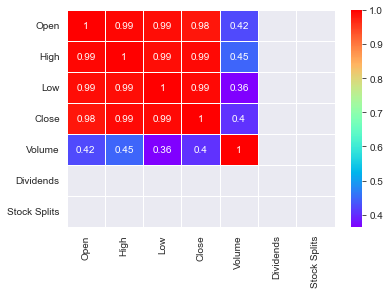

In [10]:
corr = bitcoin_data.corr()
sns.heatmap(corr, cmap = 'rainbow', annot=True, linewidth = 1)

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Dividends'}>,
        <AxesSubplot:title={'center':'Stock Splits'}>, <AxesSubplot:>]],
      dtype=object)

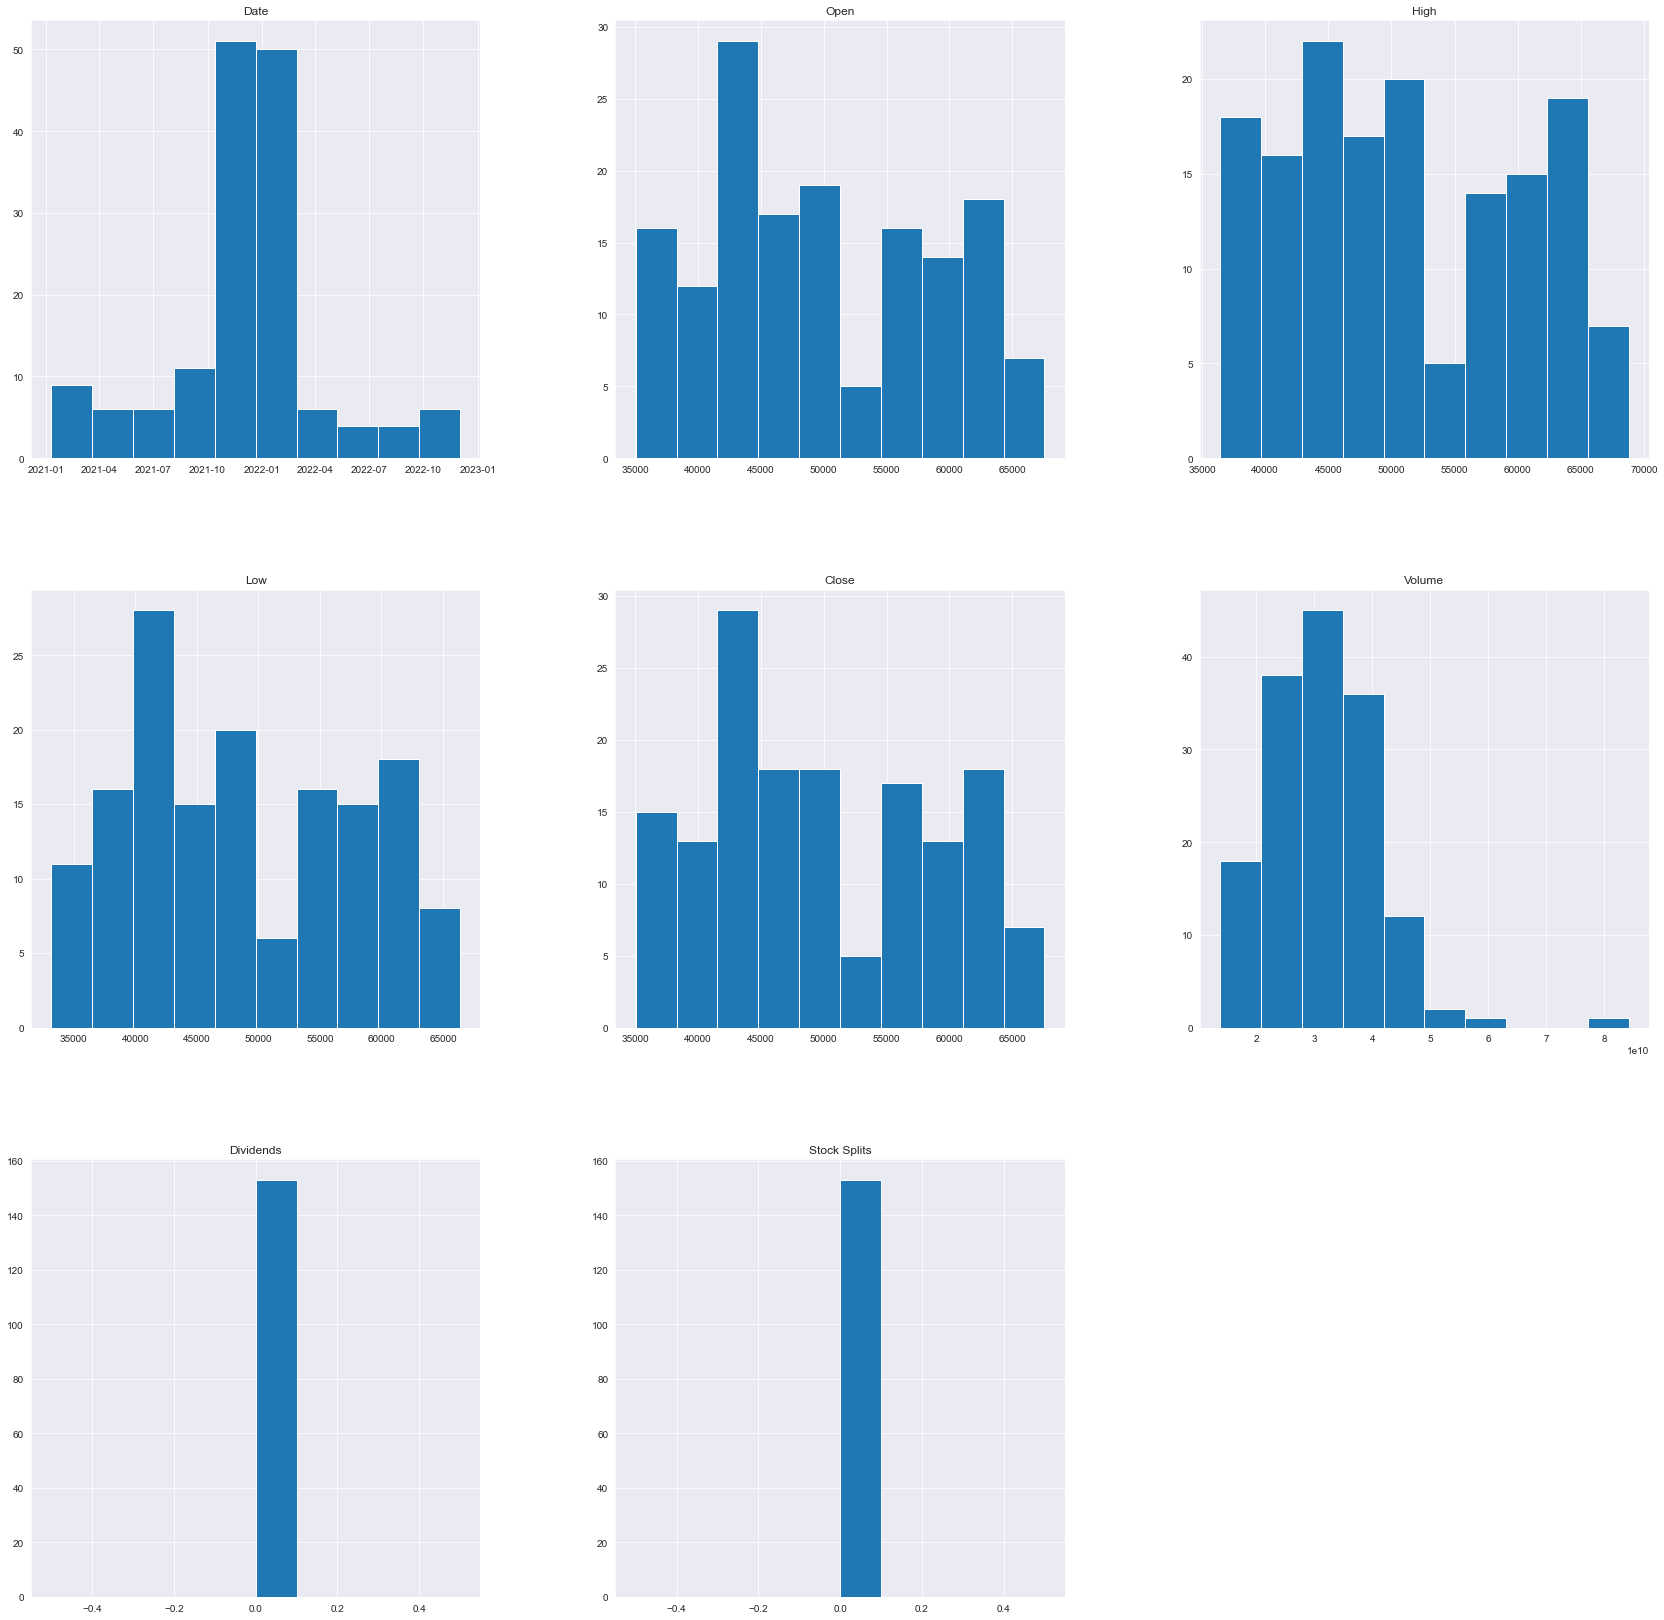

In [11]:
bitcoin_data.hist(figsize=(29,29))

C:\Users\akeis\AppData\Local\Temp\ipykernel_40432\3141744973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Change'] = bitcoin_data.High.div(bitcoin_data.High.shift())


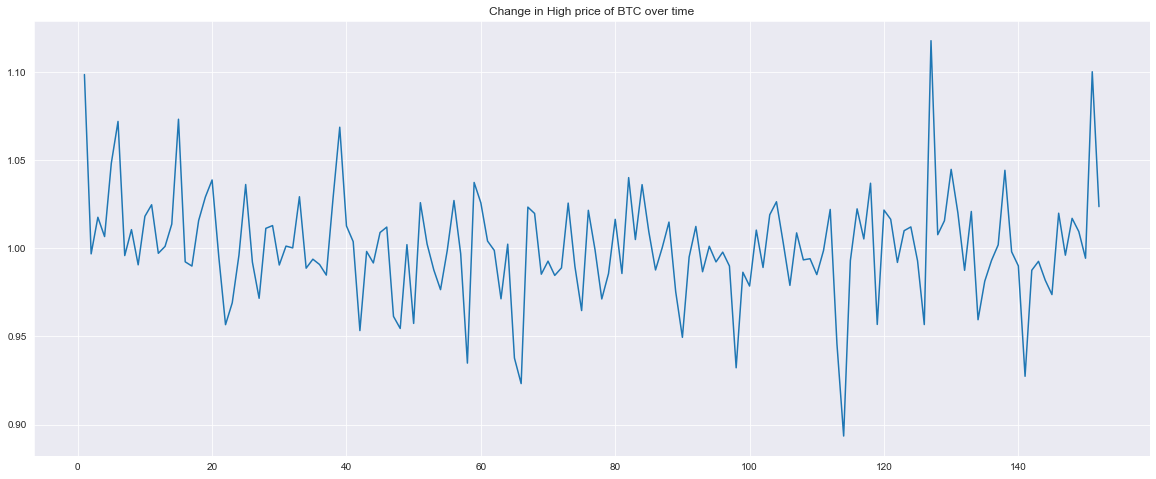

In [60]:
bitcoin_data['Change'] = bitcoin_data.High.div(bitcoin_data.High.shift())
bitcoin_data['Change'].plot(figsize=(20,8))
_ = plt.title('Change in High price of BTC over time')

C:\Users\akeis\AppData\Local\Temp\ipykernel_40432\3652191404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Volume_Change'] = bitcoin_data.Volume.div(bitcoin_data.Volume.shift())


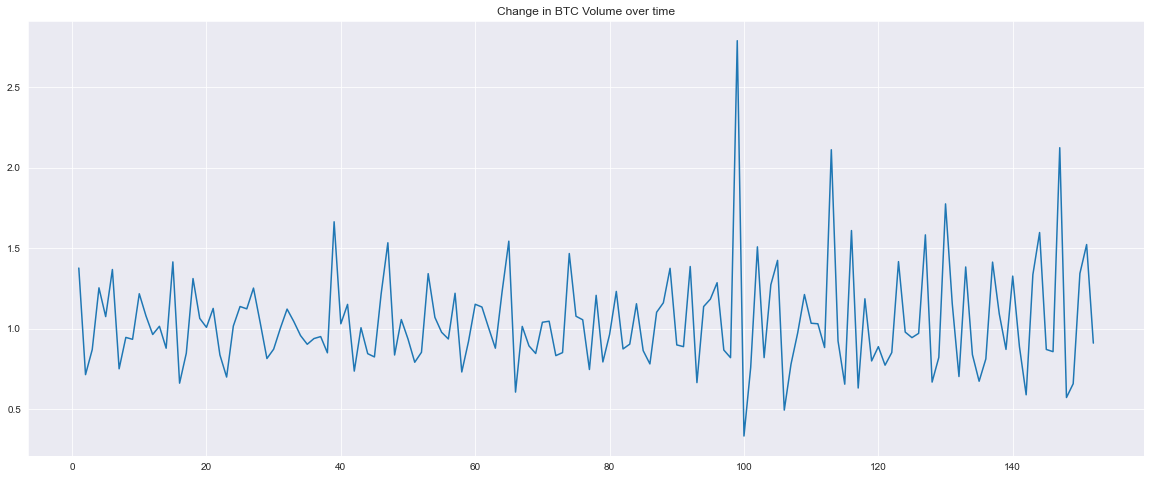

In [61]:
bitcoin_data['Volume_Change'] = bitcoin_data.Volume.div(bitcoin_data.Volume.shift())
bitcoin_data['Volume_Change'].plot(figsize=(20,8))
_ = plt.title('Change in BTC Volume over time')

C:\Users\akeis\AppData\Local\Temp\ipykernel_40432\2392387791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Return'] = bitcoin_data.Change.sub(1).mul(100)


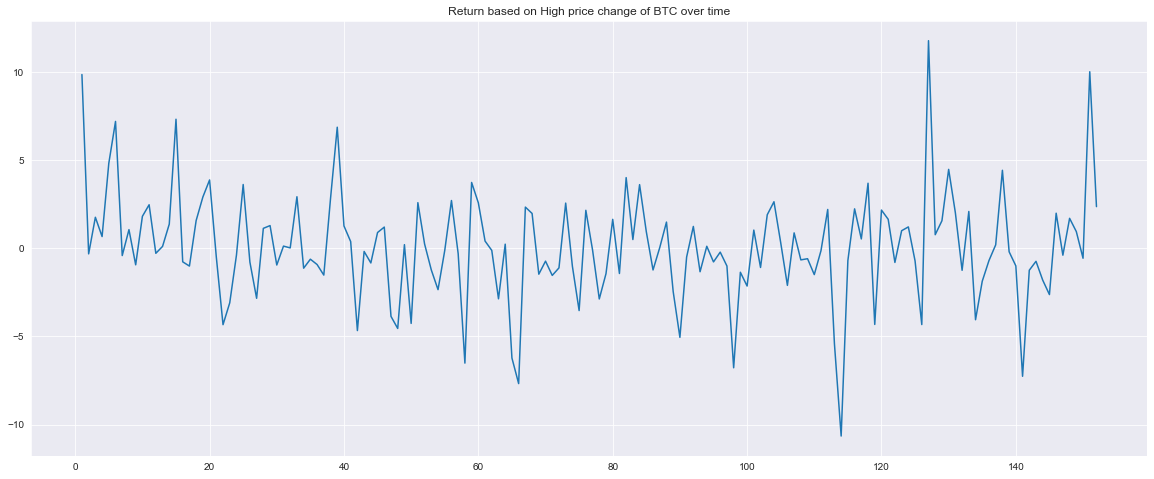

In [62]:
bitcoin_data['Return'] = bitcoin_data.Change.sub(1).mul(100)
bitcoin_data['Return'].plot(figsize=(20,8))
_ = plt.title('Return based on High price change of BTC over time')

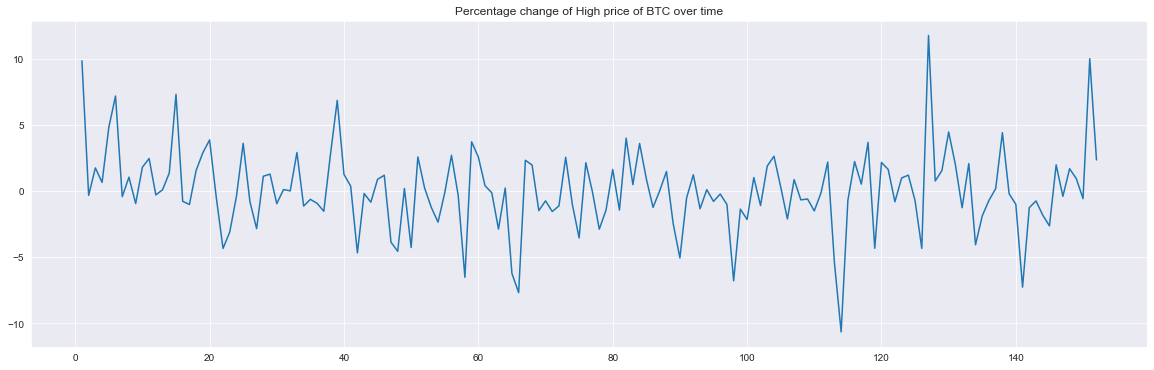

In [63]:
bitcoin_data.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns
_ = plt.title('Percentage change of High price of BTC over time')

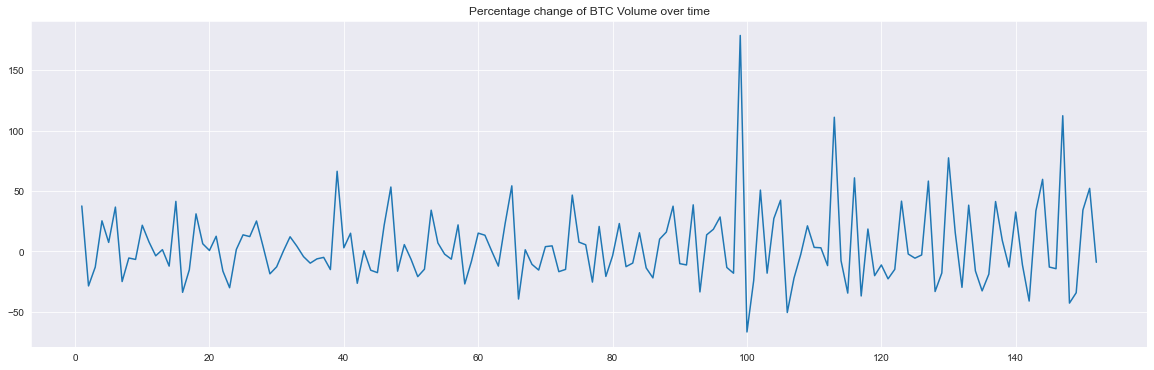

In [64]:
bitcoin_data.Volume.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns
_ = plt.title('Percentage change of BTC Volume over time')

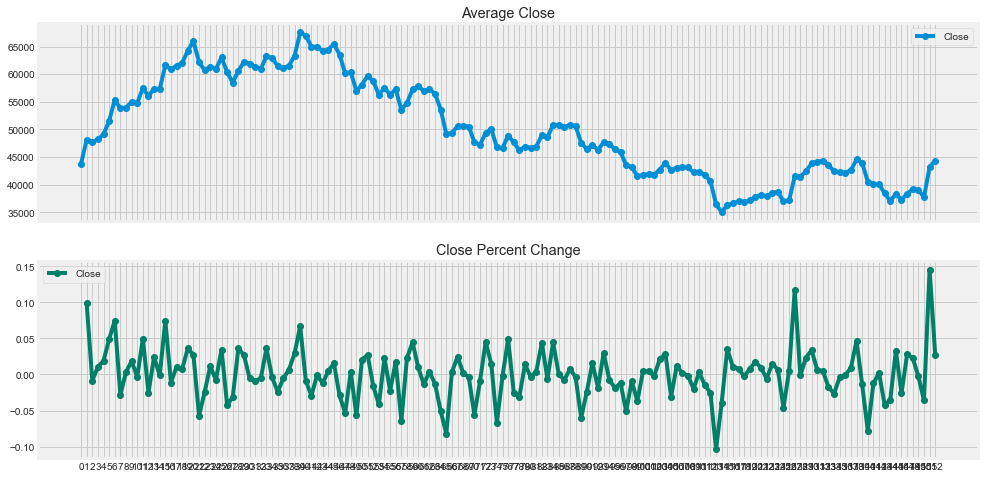

In [37]:
average    = bitcoin_data.groupby(bitcoin_data.index)["Close"].mean()
pct_change = bitcoin_data.groupby(bitcoin_data.index)["Close"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Close",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Close Percent Change",grid=True)


<AxesSubplot:>

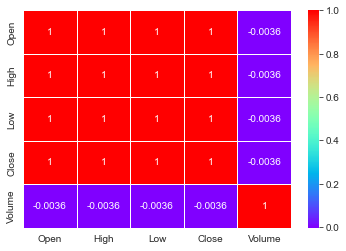

In [31]:
corr = df.corr()
sns.heatmap(corr, cmap = 'rainbow', annot=True, linewidth = 1)


In [22]:
top_5_currency_names = df.groupby(['name'])['Close'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

Open         High          Low        Close        Volume symbol  \
0  41551.26953  44092.60156  41444.58203  43790.89453  3.114168e+10    BTC   
1  43816.74219  48436.01172  43320.02344  48116.94141  4.285064e+10    BTC   
2  48137.46875  48282.06250  47465.49609  47711.48828  3.061435e+10    BTC   
3  47680.02734  49130.69141  47157.28906  48199.95313  2.663812e+10    BTC   
4  48208.90625  49456.77734  47045.00391  49112.90234  3.338317e+10    BTC   

      name  
0  Bitcoin  
1  Bitcoin  
2  Bitcoin  
3  Bitcoin  
4  Bitcoin

In [26]:
data_top_5_currencies.describe()

Open          High           Low         Close        Volume
count    765.000000    765.000000    765.000000    765.000000  7.650000e+02
mean   10888.710644  11144.451100  10603.639281  10885.896062  1.117691e+10
std    20009.673907  20462.837111  19506.228563  20003.042304  1.279483e+10
min       83.106400     87.163979     76.859573     83.123161  5.377374e+08
25%      178.532410    184.375183    173.733108    178.517944  1.872498e+09
50%      485.099426    494.914887    468.939606    485.111023  3.109040e+09
75%     4171.855957   4300.306641   4033.492432   4171.663574  1.913150e+10
max    67549.734380  68789.625000  66382.062500  67566.828130  8.419661e+10

In [80]:
top_5_currency_names = df.groupby(['name'])['Volume'].last().sort_values(ascending=False).head(5).index
data_top_5_currencies = df[df['name'].isin(top_5_currency_names)]
data_top_5_currencies.head(5)

Date         Open         High          Low        Close  \
0 2021-09-30  41551.26953  44092.60156  41444.58203  43790.89453   
1 2021-01-10  43816.74219  48436.01172  43320.02344  48116.94141   
2 2021-02-10  48137.46875  48282.06250  47465.49609  47711.48828   
3 2021-03-10  47680.02734  49130.69141  47157.28906  48199.95313   
4 2021-04-10  48208.90625  49456.77734  47045.00391  49112.90234   

         Volume  Dividends  Stock Splits symbol     name  
0  3.114168e+10          0             0    BTC  Bitcoin  
1  4.285064e+10          0             0    BTC  Bitcoin  
2  3.061435e+10          0             0    BTC  Bitcoin  
3  2.663812e+10          0             0    BTC  Bitcoin  
4  3.338317e+10          0             0    BTC  Bitcoin

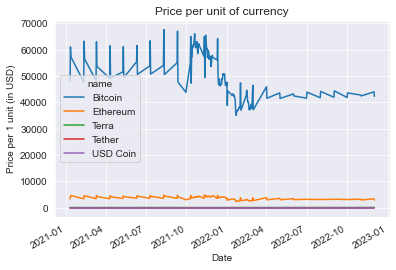

In [82]:
ax = data_top_5_currencies.groupby(['Date', 'name'])['Close'].mean().unstack().plot();
ax.set_ylabel("Price per 1 unit (in USD)");
plt.title("Price per unit of currency");

In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3021    20.512822
3022    20.394468
3023    20.248099
3024    20.115923
3025    19.978909
Name: Close, Length: 3026, dtype: float64

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3021    48.373586
3022    47.812869
3023    47.223415
3024    46.590312
3025    45.983802
Name: Close, Length: 3026, dtype: float64

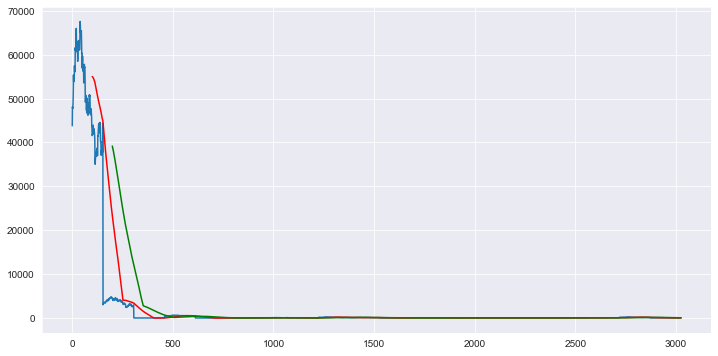

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')#
plt.plot(ma200, 'g')

In [64]:
df.shape

(3026, 7)

In [65]:
#splitting data into training and testing
training_data= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
testing_data = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(training_data.shape)
print(testing_data.shape)

(2118, 1)
(908, 1)


In [66]:
training_data.head()

Close
Date                   
2021-09-30  43790.89453
2021-01-10  48116.94141
2021-02-10  47711.48828
2021-03-10  48199.95313
2021-04-10  49112.90234

In [16]:
testing_data.head()

Close
2118  1.248175
2119  1.243724
2120  1.223871
2121  1.241118
2122  1.263054

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))

In [68]:
training_data_array = scaler.fit_transform(training_data)
training_data_array

array([[6.48112332e-01],
       [7.12138526e-01],
       [7.06137754e-01],
       ...,
       [1.88924212e-05],
       [1.98917284e-05],
       [1.99969876e-05]])

In [69]:
training_data_array.shape

(2118, 1)

In [70]:
x_train = []
y_train = []
for i in range(100, training_data_array.shape[0]):
    x_train.append(training_data_array[i-100: i])
    y_train.append(training_data_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [71]:
x_train.shape

(2018, 100, 1)

In [72]:
#Machine learning model
from keras.layers import Dense, LSTM,Dropout
from keras.models import Sequential

In [87]:
#Build The Model
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
model = Sequential()

model.add(LSTM(units =128, activation='relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units =128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1)) # Prediction of the next value

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(x_train, y_train, epochs = 25, batch_size=32, validation_split=0.1)


57/57 [==============================] - 12s 214ms/step - loss: 0.0015 - val_loss: 3.4093e-05
Epoch 4/25
57/57 [==============================] - 13s 221ms/step - loss: 0.0012 - val_loss: 7.8036e-08
Epoch 5/25
57/57 [==============================] - 13s 234ms/step - loss: 0.0011 - val_loss: 1.6554e-06
Epoch 6/25
57/57 [==============================] - 13s 236ms/step - loss: 7.6564e-04 - val_loss: 4.1026e-07
Epoch 7/25
57/57 [==============================] - 13s 236ms/step - loss: 8.2517e-04 - val_loss: 9.8252e-09
Epoch 8/25
57/57 [==============================] - 15s 271ms/step - loss: 7.3851e-04 - val_loss: 4.9015e-08
Epoch 9/25
57/57 [==============================] - 13s 237ms/step - loss: 0.0011 - val_loss: 2.1724e-05
Epoch 10/25
57/57 [==============================] - 13s 223ms/step - loss: 6.5467e-04 - val_loss: 1.0535e-06
Epoch 11/25
57/57 [==============================] - 13s 233ms/step - loss: 7.0262e-04 - val_loss: 1.7370e-07
Epoch 12/25
57/57 [=========================

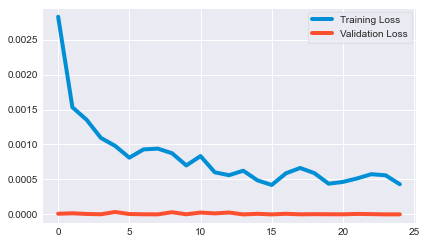

In [88]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [95]:
testing_data.head()

Close
Date                
2021-10-10  1.248175
2021-11-10  1.243724
2021-12-10  1.223871
2021-10-13  1.241118
2021-10-14  1.263054

In [96]:
training_data.tail(100)

Close
Date                
2021-02-12  0.000042
2021-03-12  0.000040
2021-04-12  0.000037
2021-05-12  0.000036
2021-06-12  0.000037
...              ...
2021-05-10  1.314544
2021-06-10  1.257643
2021-07-10  1.276508
2021-08-10  1.344028
2021-09-10  1.351140

[100 rows x 1 columns]

In [97]:
past_100_days = training_data.tail(100)

In [98]:
final_df = past_100_days.append(testing_data, ignore_index=True)

C:\Users\akeis\AppData\Local\Temp\ipykernel_14652\1373046928.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [99]:
final_df.head()

Close
0  0.000042
1  0.000040
2  0.000037
3  0.000036
4  0.000037

In [100]:
input_data = scaler.fit_transform(final_df)
input_data

array([[7.55375342e-08],
       [6.83434833e-08],
       [5.75524070e-08],
       ...,
       [4.91146679e-02],
       [5.43742528e-02],
       [5.51592600e-02]])

In [101]:
input_data.shape

(1008, 1)

In [103]:
xtest = []
ytest = []

for i in range(100, input_data.shape[0]):
    xtest.append(input_data[i-100:i])
    ytest.append(input_data[i, 0])

In [104]:
xtest,ytest = np.array(xtest), np.array(ytest)
print(xtest.shape)
print(ytest.shape)

(908, 100, 1)
(908,)


In [117]:
#making predictions
y_predicted = model.predict(xtest)

In [118]:
y_predicted.shape

(908, 1)

In [107]:
ytest

array([4.48964178e-03, 4.47363129e-03, 4.40221956e-03, 4.46425731e-03,
       4.54316188e-03, 5.69475307e-03, 5.41752689e-03, 5.23911784e-03,
       5.32034221e-03, 5.29440416e-03, 5.51009642e-03, 5.41148726e-03,
       5.44615565e-03, 5.90594507e-03, 5.66070000e-03, 6.02295999e-03,
       6.24445046e-03, 6.33048080e-03, 7.65622907e-03, 7.26797315e-03,
       6.71956001e-03, 6.96017963e-03, 6.84829057e-03, 6.96917926e-03,
       7.31842563e-03, 6.89556950e-03, 6.83953878e-03, 6.77990744e-03,
       6.77712325e-03, 6.81285978e-03, 6.38992519e-03, 6.13521267e-03,
       6.32903832e-03, 6.17134111e-03, 6.31226157e-03, 6.22158433e-03,
       6.08509852e-03, 5.62201034e-03, 5.88011123e-03, 5.38916442e-03,
       5.81978566e-03, 5.98786023e-03, 5.76380898e-03, 5.60557191e-03,
       6.30626910e-03, 6.04393082e-03, 6.42812559e-03, 5.86976989e-03,
       5.80566746e-03, 5.94163486e-03, 6.53868708e-03, 6.42187756e-03,
       7.22382317e-03, 7.65183388e-03, 8.15808581e-03, 7.12313562e-03,
      

In [108]:
y_predicted

array([[0.00107415],
       [0.00107964],
       [0.00108427],
       [0.00108805],
       [0.00109112],
       [0.00109364],
       [0.00109621],
       [0.00109892],
       [0.00110166],
       [0.00110434],
       [0.00110688],
       [0.00110932],
       [0.00111159],
       [0.00111367],
       [0.00111575],
       [0.00111775],
       [0.00111978],
       [0.00112193],
       [0.0011242 ],
       [0.00112709],
       [0.00113047],
       [0.00113393],
       [0.00113729],
       [0.00114039],
       [0.00114319],
       [0.00114583],
       [0.00114818],
       [0.00115016],
       [0.00115174],
       [0.00115295],
       [0.00115386],
       [0.00115438],
       [0.00115441],
       [0.00115407],
       [0.00115344],
       [0.00115267],
       [0.00115183],
       [0.00115091],
       [0.00114976],
       [0.00114847],
       [0.00114694],
       [0.00114536],
       [0.00114394],
       [0.00114267],
       [0.00114147],
       [0.0011406 ],
       [0.00114005],
       [0.001

In [109]:
scaler.scale_

array([0.00359703])

(2018, 100, 1)
(7, 100, 1)
[0.28044778]


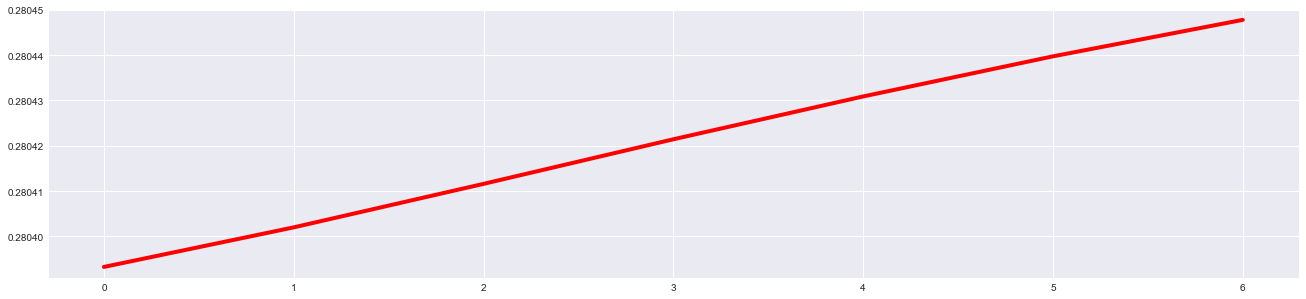

In [110]:
print(x_train.shape)
x_last_month = x_train[-7:, :, :]  #  arr[np.newaxis, :]
print(x_last_month.shape)
next_month_prediction = model.predict(x_last_month)
prediction = scaler.inverse_transform(next_month_prediction)
plt.figure(figsize = (20,5))
plt.plot(prediction, color = 'red')

print(prediction[-1])

(2018, 100, 1)
(30, 100, 1)
[0.28044778]


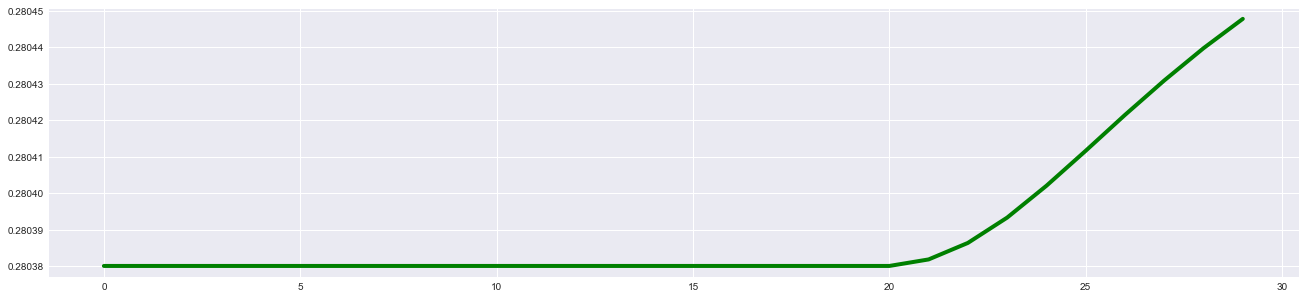

In [111]:
print(x_train.shape)
x_last_month = x_train[-30:, :, :]  #  arr[np.newaxis, :]
print(x_last_month.shape)
next_month_prediction = model.predict(x_last_month)
prediction = scaler.inverse_transform(next_month_prediction)
plt.figure(figsize = (20,5))
plt.plot(prediction, color = 'green')

print(prediction[-1])

(2018, 100, 1)
(120, 100, 1)
[0.28044778]


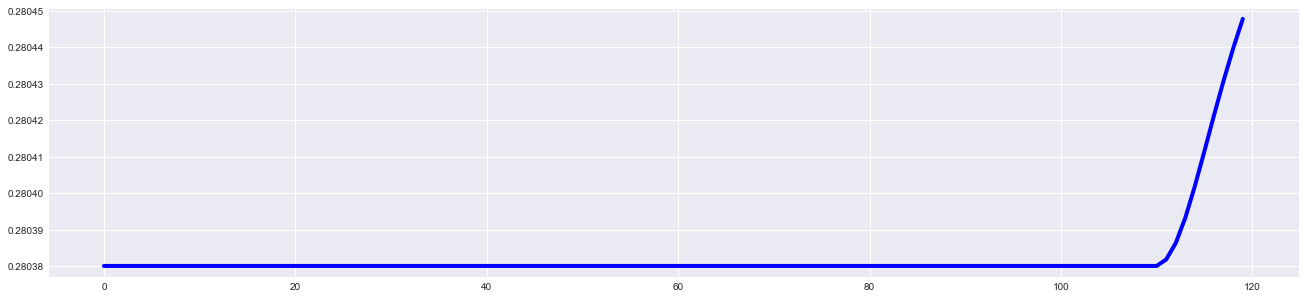

In [112]:
print(x_train.shape)
x_last_month = x_train[-120:, :, :]  #  arr[np.newaxis, :]
print(x_last_month.shape)
next_month_prediction = model.predict(x_last_month)
prediction = scaler.inverse_transform(next_month_prediction)
plt.figure(figsize = (20,5))
plt.plot(prediction, color = 'blue')

print(prediction[-1])

In [113]:
scale_factor = 1/0.003597
y_predicted = y_predicted * scale_factor
ytest = ytest * scale_factor

In [114]:
print(f'Mean Squared Error = {mean_squared_error(ytest,y_predicted)}')
print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(ytest,y_predicted))}')
print(f'Mean Absolute Error = {mean_absolute_error(ytest,y_predicted)}')
print(f' r2_score) = {r2_score(ytest, y_predicted)}')

Mean Squared Error = 392.2212527008685
Root Mean Squared Error = 19.804576559494233
Mean Absolute Error = 9.653276672057803
 r2_score) = 0.8915856626470242


In [25]:
plt.figure(figsize=(12,6))
plt.plot(ytest, 'g', label= 'Original Price')
plt.plot(y_predicted,'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'ytest' is not defined

<Figure size 864x432 with 0 Axes>

Text(0, 0.5, 'predictions')

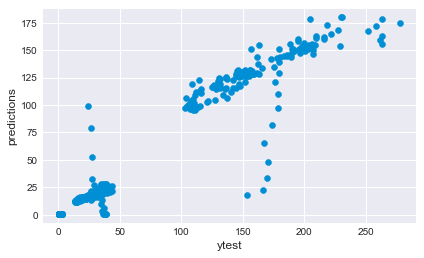

In [116]:
plt.scatter(ytest, y_predicted);
plt.xlabel('ytest')
plt.ylabel('predictions')

In [119]:
model.save('cryptocurrency_prediction.h5')